# Base de dados MNIST

In [37]:
import tensorflow
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.models import Sequential # Entrada -> Camadas escondidas -> Saída
from tensorflow.keras.layers import Dense
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist

In [38]:
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()

In [39]:
X_treinamento.shape, X_teste.shape

((60000, 28, 28), (10000, 28, 28))

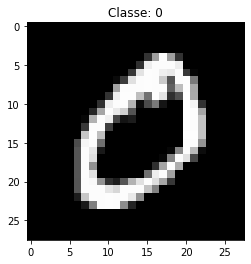

In [40]:
plt.imshow(X_treinamento[1], cmap = 'gray')
plt.title('Classe: ' + str(y_treinamento[1]));

In [41]:
y_treinamento

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [42]:
X_treinamento = X_treinamento.reshape(60000, 28 * 28)
X_treinamento.shape

(60000, 784)

In [43]:
X_treinamento[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253,
       159,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238,
       252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [44]:
X_teste.shape

(10000, 28, 28)

In [45]:
X_teste = X_teste.reshape(10000, 28 * 28)
X_teste.shape

(10000, 784)

In [46]:
y_treinamento, y_teste

(array([5, 0, 4, ..., 5, 6, 8], dtype=uint8),
 array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

# Pré-processamento dos dados

In [47]:
X_treinamento = X_treinamento.astype('float32')
X_teste = X_teste.astype('float32')

In [48]:
X_treinamento[1]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,  51., 159., 253., 159.,  50.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [49]:
X_treinamento = X_treinamento / 255
X_teste = X_teste / 255

In [50]:
X_treinamento[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [51]:
X_treinamento.max(), X_treinamento.min()

(1.0, 0.0)

In [52]:
y_treinamento

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [53]:
y_treinamento = np_utils.to_categorical(y_treinamento)

In [54]:
y_treinamento[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [55]:
y_treinamento[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [56]:
y_treinamento[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [57]:
y_teste = np_utils.to_categorical(y_teste)
y_teste

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Construção e treinamento da rede neural

In [58]:
(784 + 10) / 2

397.0

In [61]:
# 784 -> 397 -> 397 -> 10
rede_neural = Sequential()
rede_neural.add(Dense(input_shape = (784, ), units = 397, activation = 'relu'))
rede_neural.add(Dense(units = 397, activation = 'relu'))
rede_neural.add(Dense(units = 10, activation = 'softmax'))

In [62]:
rede_neural.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [63]:
rede_neural.fit(X_treinamento, y_treinamento, batch_size = 128, epochs = 20, verbose = 1)

Epoch 1/20
Extension horovod.torch has not been built: /usr/local/lib/python3.8/site-packages/horovod/torch/mpi_lib/_mpi_lib.cpython-38-x86_64-linux-gnu.so not found
If this is not expected, reinstall Horovod with HOROVOD_WITH_PYTORCH=1 to debug the build error.
Warning! MPI libs are missing, but python applications are still avaiable.
[2022-06-01 16:45:14.557 tensorflow-2-6-cpu-py-ml-t3-medium-9169b2e75617c45c79c40579f6a8:297 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2022-06-01 16:45:14.858 tensorflow-2-6-cpu-py-ml-t3-medium-9169b2e75617c45c79c40579f6a8:297 INFO profiler_config_parser.py:111] Unable to find config at /opt/ml/input/config/profilerconfig.json. Profiler is disabled.
469/469 [==============================] - 5s 7ms/step - loss: 0.2321 - accuracy: 0.9311
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0857 - accuracy: 0.9734
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0558 - accuracy: 0.9826
Epoch 4/

# Avaliação e previsões

In [64]:
rede_neural.evaluate(X_teste, y_teste)

313/313 [==============================] - 1s 2ms/step - loss: 0.0841 - accuracy: 0.9829


[0.08407076448202133, 0.9829000234603882]

In [65]:
previsoes = rede_neural.predict(X_teste)

In [66]:
previsoes

array([[2.74302091e-15, 1.25706723e-10, 2.06860370e-14, ...,
        1.00000000e+00, 1.40308850e-16, 2.12786275e-10],
       [1.41871461e-21, 2.66451599e-15, 1.00000000e+00, ...,
        1.50146754e-18, 1.71994594e-24, 4.68213656e-30],
       [4.40219345e-12, 1.00000000e+00, 6.59897248e-10, ...,
        5.05117548e-08, 5.35258486e-08, 2.77913865e-14],
       ...,
       [2.09167643e-20, 2.67635459e-14, 4.80028954e-22, ...,
        1.69114202e-11, 8.75618787e-17, 3.18297092e-13],
       [3.18775473e-23, 1.00903410e-18, 2.64037475e-22, ...,
        6.57270766e-17, 3.03956079e-12, 6.62828913e-21],
       [1.06116526e-16, 7.47989479e-22, 2.49035183e-19, ...,
        3.91426697e-22, 1.23876525e-15, 5.43772984e-18]], dtype=float32)

In [67]:
previsoes.shape

(10000, 10)

In [68]:
previsoes[0]

array([2.7430209e-15, 1.2570672e-10, 2.0686037e-14, 1.1398694e-13,
       1.7266788e-15, 2.7782241e-16, 1.5855694e-18, 1.0000000e+00,
       1.4030885e-16, 2.1278627e-10], dtype=float32)

In [73]:
np.argmax(previsoes[0])

7

In [71]:
import numpy as np
np.argmax(y_teste[0])

7

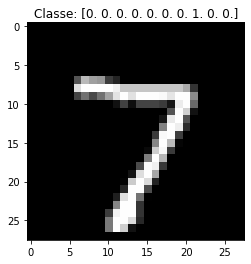

In [72]:
plt.imshow(X_teste[0].reshape(28,28), cmap='gray')
plt.title('Classe: ' + str(y_teste[0]));

In [74]:
rede_neural.save('modelo_final_tensorflow.h5')

In [75]:
nova_rede_neural = tensorflow.keras.models.load_model('modelo_final_tensorflow.h5')

In [76]:
nova_rede_neural.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 397)               311645    
_________________________________________________________________
dense_10 (Dense)             (None, 397)               158006    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                3980      
Total params: 473,631
Trainable params: 473,631
Non-trainable params: 0
_________________________________________________________________


In [77]:
nova_rede_neural.predict(X_teste)

array([[2.74302091e-15, 1.25706723e-10, 2.06860370e-14, ...,
        1.00000000e+00, 1.40308850e-16, 2.12786275e-10],
       [1.41871461e-21, 2.66451599e-15, 1.00000000e+00, ...,
        1.50146754e-18, 1.71994594e-24, 4.68213656e-30],
       [4.40219345e-12, 1.00000000e+00, 6.59897248e-10, ...,
        5.05117548e-08, 5.35258486e-08, 2.77913865e-14],
       ...,
       [2.09167643e-20, 2.67635459e-14, 4.80028954e-22, ...,
        1.69114202e-11, 8.75618787e-17, 3.18297092e-13],
       [3.18775473e-23, 1.00903410e-18, 2.64037475e-22, ...,
        6.57270766e-17, 3.03956079e-12, 6.62828913e-21],
       [1.06116526e-16, 7.47989479e-22, 2.49035183e-19, ...,
        3.91426697e-22, 1.23876525e-15, 5.43772984e-18]], dtype=float32)